In [3]:
import numpy as np
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random
import math

In [26]:
aus_open_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-ausopen-matches.csv'
aus_open_2011_matches = pd.read_csv(aus_open_2011_matches_path) 
aus_open_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-ausopen-points.csv'
aus_open_2011_points = pd.read_csv(aus_open_2011_points_path) 

french_open_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-frenchopen-matches.csv'
french_open_2011_matches = pd.read_csv(french_open_2011_matches_path) 
french_open_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-frenchopen-points.csv'
french_open_2011_points = pd.read_csv(french_open_2011_points_path) 

us_open_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-usopen-matches.csv'
us_open_2011_matches = pd.read_csv(us_open_2011_matches_path) 
us_open_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-usopen-points.csv'
us_open_2011_points = pd.read_csv(us_open_2011_points_path) 


wimble_2011_matches_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-wimbledon-matches.csv'
wimble_2011_matches = pd.read_csv(wimble_2011_matches_path) 
wimble_2011_points_path = '/Users/sven/repos/stanford/cs_230/project/DeepTennis/data/2011-wimbledon-points.csv'
wimble_2011_points = pd.read_csv(wimble_2011_points_path) 


In [27]:
# print(us_open_2011_matches['winner'])
# print(aus_open_2012_points.columns)


In [28]:
match_1_id = aus_open_2012_matches.get('match_id')[1]


In [29]:
match_1_data = dict(aus_open_2012_matches.loc[1])
match_1_points = aus_open_2012_points.loc[aus_open_2012_points['match_id'] == match_1_id]

In [31]:
match_1_points.sort_values('PointNumber').iloc[0]

match_id              2012-ausopen-1103
ElapsedTime                     0:00:00
SetNo                                 1
P1GamesWon                            0
P2GamesWon                            0
SetWinner                             0
GameNo                                1
GameWinner                            0
PointNumber                           1
PointWinner                           2
PointServer                           2
Speed_KMH                           178
Rally                               NaN
P1Score                               0
P2Score                              15
P1Momentum                            0
P2Momentum                            3
P1PointsWon                           0
P2PointsWon                           1
P1Ace                                 0
P2Ace                                 0
P1Winner                              0
P2Winner                              1
P1DoubleFault                         0
P2DoubleFault                         0


In [78]:
pd.options.display.max_rows = 500

print(match_1_points[{'P1Winner', 'P2Winner'}])

    P2Winner  P1Winner
0        0.0       0.0
1        0.0       0.0
2        0.0       0.0
3        0.0       0.0
4        0.0       0.0
5        0.0       1.0
6        0.0       0.0
7        0.0       0.0
8        0.0       1.0
9        0.0       0.0
10       0.0       1.0
11       0.0       0.0
12       0.0       0.0
13       0.0       0.0
14       0.0       0.0
15       0.0       0.0
16       0.0       0.0
17       0.0       0.0
18       0.0       1.0
19       0.0       0.0
20       0.0       1.0
21       0.0       0.0
22       0.0       0.0
23       0.0       0.0
24       0.0       1.0
25       0.0       1.0
26       0.0       1.0
27       0.0       1.0
28       0.0       1.0
29       0.0       0.0
30       0.0       1.0
31       0.0       0.0
32       0.0       0.0
33       0.0       0.0
34       0.0       0.0
35       0.0       0.0
36       0.0       1.0
37       0.0       0.0
38       0.0       0.0
39       0.0       0.0
40       0.0       1.0
41       0.0       1.0
42       0.

In [215]:
valid_fields = {
# 'ElapsedTime',
# 'SetNo',
'P1GamesWon',
'P2GamesWon',
# 'SetWinner',
# 'GameNo',
# 'GameWinner',
# 'PointNumber',
# 'PointWinner',
# 'PointServer',
# 'Speed_KMH',
# 'Rally',
'P1Score',
'P2Score',
# 'P1Momentum',
# 'P2Momentum',
'P1PointsWon',
'P2PointsWon',
'P1Ace',
'P2Ace',
'P1Winner',
'P2Winner',
'P1DoubleFault',
'P2DoubleFault',
'P1UnfErr',
'P2UnfErr',
'P1NetPoint',
'P2NetPoint',
'P1NetPointWon',
'P2NetPointWon',
'P1BreakPoint',
'P2BreakPoint',
'P1BreakPointWon',
'P2BreakPointWon',
'P1FirstSrvIn',
'P2FirstSrvIn',
'P1FirstSrvWon',
'P2FirstSrvWon',
'P1SecondSrvIn',
'P2SecondSrvIn',
'P1SecondSrvWon',
'P2SecondSrvWon',
'P1ForcedError',
'P2ForcedError',
# 'History',
# 'Speed_MPH',
# 'P1BreakPointMissed',
# 'P2BreakPointMissed',
# 'ServeIndicator',
# 'P1TurningPoint', 
# 'P2TurningPoint'
}

shuffle_pairs = {
    ('P1GamesWon','P2GamesWon'),
    ('P1BreakPointMissed','P2BreakPointMissed'),
    ('P1Score', 'P2Score'),
    ('P1Momentum', 'P2Momentum'),
    ('P1PointsWon', 'P2PointsWon'),
    ('P1Ace', 'P2Ace'),
    ('P1Winner', 'P2Winner'),
    ('P1DoubleFault', 'P2DoubleFault'),
    ('P1UnfErr', 'P2UnfErr'),
    ('P1NetPoint', 'P2NetPoint'),
    ('P1NetPointWon', 'P2NetPointWon'),
    ('P1BreakPoint', 'P2BreakPoint'),
    ('P1BreakPointWon', 'P2BreakPointWon'),
    ('P1FirstSrvIn', 'P2FirstSrvIn'),
    ('P1FirstSrvWon', 'P2FirstSrvWon'),
    ('P1SecondSrvIn', 'P2SecondSrvIn'), 
    ('P1SecondSrvWon', 'P2SecondSrvWon'),
    ('P1ForcedError', 'P2ForcedError'),
    ('P1TurningPoint', 'P2TurningPoint')
}

In [204]:
def parse_time(time_string):
    hr, m, s = [int(x) for x in time_string.split(':')]
    return 3600*hr + 60 * m + s

def extract_numpy_from_match(match_points, shuffle_players=False):
    
    match_points_copy = match_points.copy()
    if shuffle_players:
        for p1_val, p2_val in shuffle_pairs:
            tmp = match_points_copy[p1_val]
            match_points_copy[p1_val] = match_points_copy[p2_val]
            match_points_copy[p2_val] = tmp
    parsed_time = match_points_copy
    parsed_time['ElapsedTime'] = parsed_time['ElapsedTime'].map(lambda x: parse_time(x))
    parsed_scores = parsed_time.replace('AD', 55)
    
    
    scores = parsed_scores[list(valid_fields)].to_numpy(dtype=np.float)
    scores = scores[~np.isnan(scores).any(axis=1)]
    assert np.sum(np.isnan(scores)) < 1, f"hit a nan {scores}"
    return scores
    

In [205]:
def get_match_data(match_id, match_data, point_data, soften_curve):
    shuffle_players = random.uniform(0, 1) > 0.5
    winner = match_data.loc[match_data['match_id'] == match_id].iloc[0]['winner'] - 1
    
    point_data = point_data.loc[point_data['match_id'] == match_id]
    
    if shuffle_players:
        winner = (winner + 1) % 2
#         assert winner < 2, f'{winner}, {match_id}'

    parsed_point_data = extract_numpy_from_match(point_data, shuffle_players)
    num_points = parsed_point_data.shape[0]
        
    y_gt = np.full(shape=num_points, fill_value=winner, dtype='float')

    if soften_curve:
        if winner == 1:
            for i in range(num_points):
                if i > 25:
                    y_gt[i] = y_gt[i] -0.5*(1.0-(i-25)/(num_points-25))
                else:
                    y_gt[i] = 0.5
        else:
            for i in range(num_points):
                if i > 25:
                    y_gt[i] = y_gt[i] +0.5*(1.0-(i-25)/(num_points-25))
                else:
                    y_gt[i] = 0.5
    
    return parsed_point_data, y_gt
    

In [206]:
def get_training_data_from_open(open_matches, open_points, get_match_info=False):
    data = []
    non_nan_matches = open_matches[open_matches['winner'].isin([1,2])]
    for match_id in non_nan_matches['match_id']:
        t_data, label = get_match_data(match_id, open_matches, open_points, soften_curve=False)
        if get_match_info:
            p1 = open_matches.loc[open_matches['match_id'] == match_id]['player1'].iloc[0]
            p2 = open_matches.loc[open_matches['match_id'] == match_id]['player2'].iloc[0]
            winner = open_matches.loc[open_matches['match_id'] == match_id]['winner'].iloc[0]
            data.append([t_data, label, f'{p1} vs {p2} winner was {winner}'])
        else:
            data.append([t_data, label])
    return data

In [207]:
training_data_aussie_open = get_training_data_from_open(aus_open_2011_matches, aus_open_2011_points)

In [208]:
x, y = training_data_aussie_open[12]

In [209]:
x.shape

(209, 34)

In [210]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [211]:
class TennisLSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(TennisLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        

        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        assert np.sum(torch.isnan(lstm_out).detach().numpy()) < 1, "hit a nan"
        linear_output = self.linear(lstm_out)
        assert np.sum(torch.isnan(linear_output).detach().numpy()) < 1, "hit a nan"
        y_pred = torch.sigmoid(linear_output)
        assert np.sum(torch.isnan(linear_output).detach().numpy()) < 1, "hit a nan"
#         y_pred = F.log_softmax(self.linear(lstm_out))
        return y_pred.view(-1)

In [212]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [213]:
def weighted_loss(y_gt, y_pred, weighting=None, alpha=.9, loss_fn=torch.nn.MSELoss(reduction='none')):
    weight = np.ones(y_gt.shape)
    for i in range(weight.shape[0]):
        if weighting is None:
            weight[i] = weight[i]*sigmoid((.1 + .9*(i/weight.shape[0])) - 0.5)
        else:
            weight[i] = weight[i]*weighting
    weight = torch.from_numpy(weight)
    pointwise_loss = weight * loss_fn(y_gt, y_pred)
    
    assert np.sum(torch.isnan(pointwise_loss).detach().numpy()) < 1, "hit a nan"
    
#     print(weight*pointwise_loss)

    return torch.sum(pointwise_loss)
    

In [216]:
model = TennisLSTM(input_dim=32, hidden_dim=50, batch_size=1, output_dim=1,
                    num_layers=2)

num_epochs = 40

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
hist = np.zeros(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
loss_fn = weighted_loss
training_data = get_training_data_from_open(aus_open_2011_matches, aus_open_2011_points)
print(f'training on {len(training_data)} examples')
training_data += get_training_data_from_open(us_open_2011_matches, us_open_2011_points)
print(f'training on {len(training_data)} examples')
training_data += get_training_data_from_open(french_open_2011_matches, french_open_2011_points)
print(f'training on {len(training_data)} examples')

for epoch in range(num_epochs):
    losses = []
    # Forward pass
    print(f'epoch {epoch}')
    for i, data in enumerate(training_data):
        model.hidden = model.init_hidden()
#         optimizer.zero_grad()
        X_train, y_train  = data 
        X_train = torch.tensor(X_train, device=device).float()
        y_train = torch.tensor(y_train, device=device).float()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        if i % 10 == 0: # janky batches
            optimizer.step()
            model.zero_grad()
            optimizer.zero_grad()       
        losses.append(loss.data.numpy())
        
#         if True or epoch == num_epochs - 1:# and i > 100:
#             fig = plt.figure()
#             gt = y_train
#             ax = plt.axes()
#             ax.plot(preds);
#             ax.plot(gt);
#             plt.show()
    print(f'epoch {epoch} avg loss {np.mean(losses)}')

        
    



cpu
training on 179 examples
training on 340 examples
training on 534 examples
epoch 0
epoch 0 avg loss 21.172773641336065
epoch 1
epoch 1 avg loss 19.35529954949223
epoch 2
epoch 2 avg loss 19.227861001748302
epoch 3
epoch 3 avg loss 18.944023642478506
epoch 4
epoch 4 avg loss 18.652402593244446
epoch 5
epoch 5 avg loss 17.73558836743741
epoch 6
epoch 6 avg loss 17.749786640783544
epoch 7
epoch 7 avg loss 17.591989638064483
epoch 8
epoch 8 avg loss 16.108092374021
epoch 9
epoch 9 avg loss 16.073214160020722
epoch 10
epoch 10 avg loss 15.287287141588017
epoch 11
epoch 11 avg loss 14.7555107698365
epoch 12
epoch 12 avg loss 14.091464512260577
epoch 13
epoch 13 avg loss 13.75494428527008
epoch 14
epoch 14 avg loss 13.991483405761013
epoch 15
epoch 15 avg loss 12.670904444081353
epoch 16
epoch 16 avg loss 11.806709432179687
epoch 17
epoch 17 avg loss 11.057113760399034
epoch 18
epoch 18 avg loss 10.773841346125444
epoch 19
epoch 19 avg loss 12.998001796579459
epoch 20
epoch 20 avg loss 11

testing on 117 examples
Juan Martin Del Potro vs Flavio Cipolla winner was 1
winner should be 1.0
(143, 32)
predicted correctly


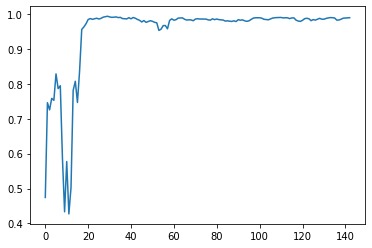


Radek Stepanek vs Fernando Verdasco winner was 2
winner should be 1.0
(350, 32)
failed


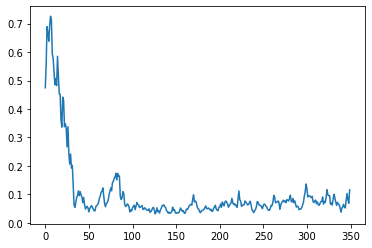


Andy Murray vs Daniel Gimeno-Traver winner was 1
winner should be 1.0
(186, 32)
predicted correctly


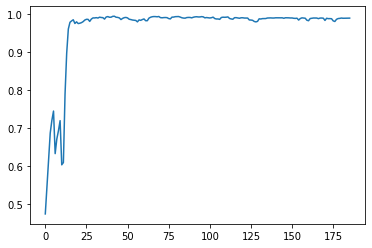


Ivan Ljubicic vs Marin Cilic winner was 1
winner should be 0.0
(232, 32)
predicted correctly


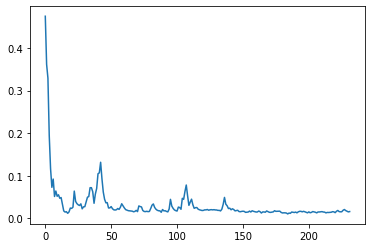


Ivo Karlovic vs Janko Tipsarevic winner was 1
winner should be 0.0
(95, 32)
predicted correctly


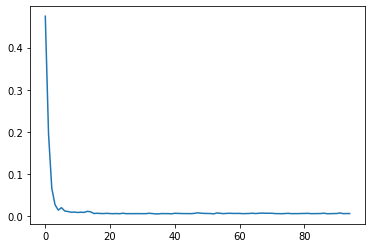


Andreas Beck vs Andy Roddick winner was 2
winner should be 1.0
(201, 32)
predicted correctly


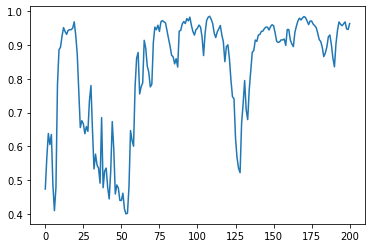


David Ferrer vs Benoit Paire winner was 1
winner should be 0.0
(188, 32)
predicted correctly


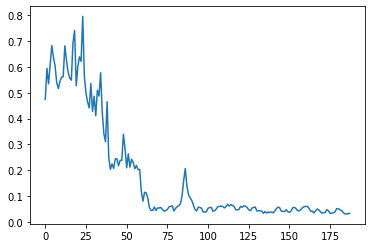


John Isner vs Nicolas Mahut winner was 1
winner should be 0.0
(202, 32)
predicted correctly


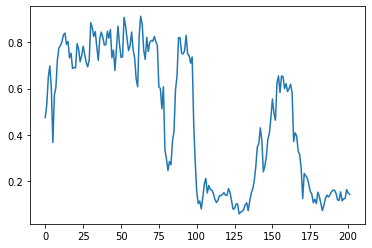


Mikhail Kukushkin vs Roger Federer winner was 2
winner should be 0.0
(174, 32)
failed


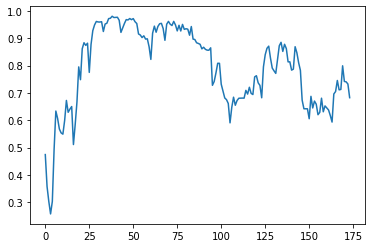


Robin Soderling vs Philipp Petzschner winner was 1
winner should be 1.0
(298, 32)
predicted correctly


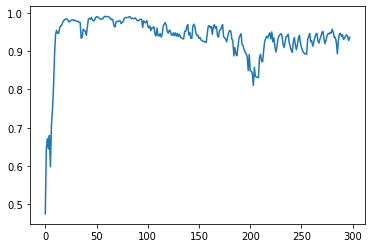


Kei Nishikori vs Lleyton Hewitt winner was 2
winner should be 1.0
(273, 32)
predicted correctly


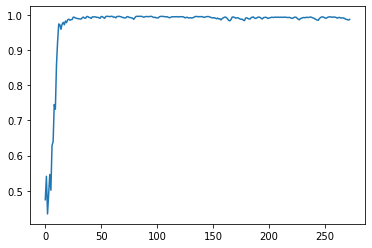


Ernests Gulbis vs Dmitry Tursunov winner was 2
winner should be 1.0
(276, 32)
predicted correctly


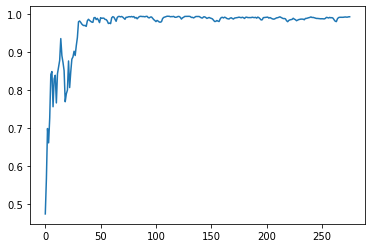


James Ward vs Michael Llodra winner was 2
winner should be 1.0
(204, 32)
predicted correctly


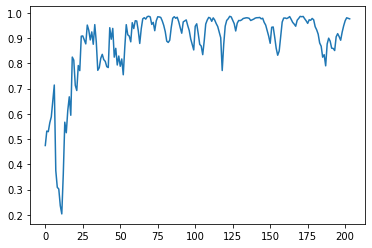


Marcos Baghdatis vs James Blake winner was 1
winner should be 1.0
(314, 32)
predicted correctly


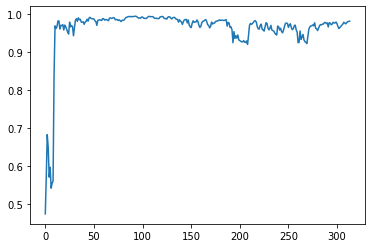


Jeremy Chardy vs Novak Djokovic winner was 2
winner should be 0.0
(137, 32)
predicted correctly


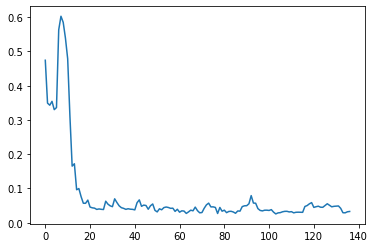


Rafael Nadal vs Ryan Sweeting winner was 1
winner should be 1.0
(180, 32)
predicted correctly


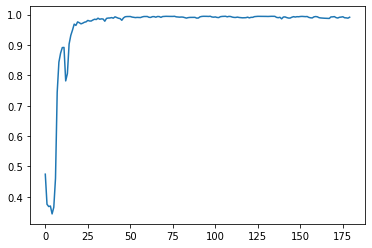


Gilles Muller vs Milos Raonic winner was 1
winner should be 1.0
(30, 32)
failed


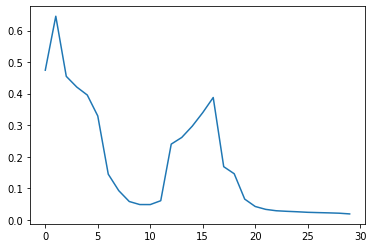


Juan Martin Del Potro vs Olivier Rochus winner was 1
winner should be 1.0
(234, 32)
failed


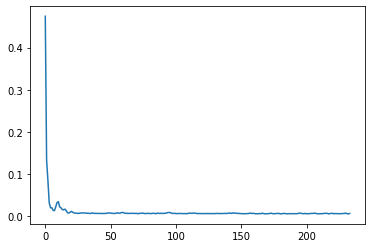


Mardy Fish vs Denis Istomin winner was 1
winner should be 1.0
(207, 32)
failed


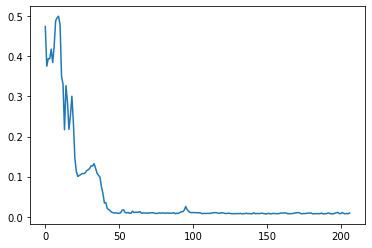


Robin Haase vs Fernando Verdasco winner was 1
winner should be 0.0
(266, 32)
predicted correctly


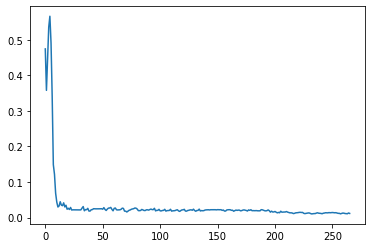


Julien Benneteau vs Tomas Berdych winner was 2
winner should be 1.0
(140, 32)
predicted correctly


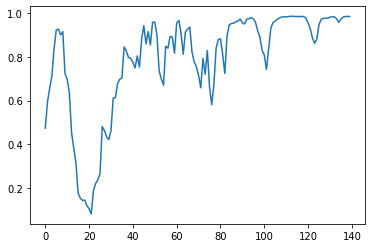


Andy Murray vs Tobias Kamke winner was 1
winner should be 0.0
(171, 32)
predicted correctly


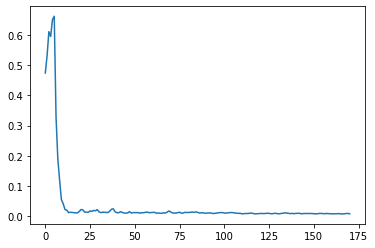


Richard Gasquet vs Igor Kunitsyn winner was 1
winner should be 1.0
(155, 32)
predicted correctly


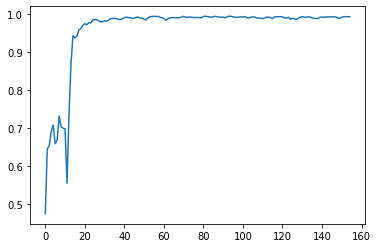


Simone Bolelli vs Stanislas Wawrinka winner was 1
winner should be 1.0
(227, 32)
failed


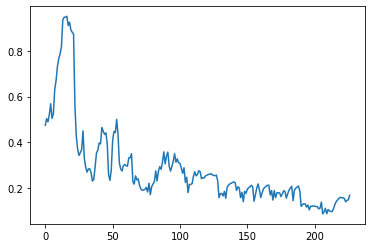


Victor Hanescu vs Andy Roddick winner was 2
winner should be 1.0
(162, 32)
failed


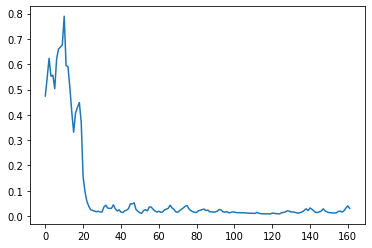


David Ferrer vs Ryan Harrison winner was 1
winner should be 1.0
(293, 32)
predicted correctly


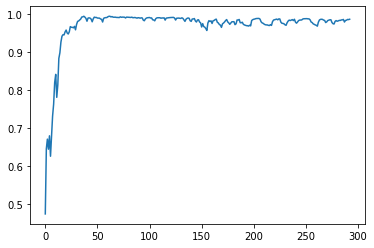


Grigor Dimitrov vs Jo-Wilfried Tsonga winner was 2
winner should be 1.0
(337, 32)
failed


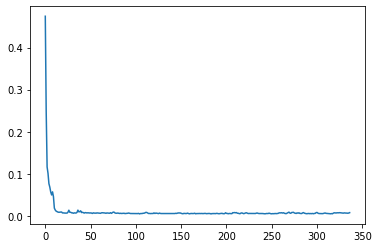


Nicolas Almagro vs John Isner winner was 1
winner should be 0.0
(283, 32)
failed


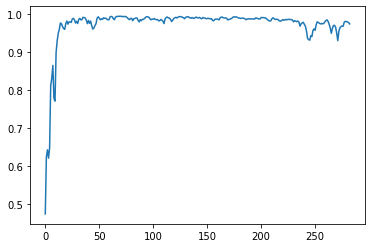


David Nalbandian vs Andreas Haider-Maurer winner was 1
winner should be 0.0
(246, 32)
predicted correctly


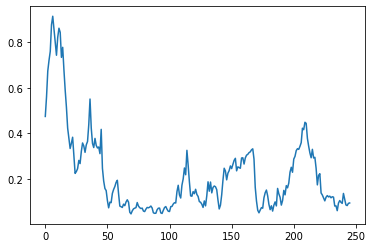


Adrian Mannarino vs Roger Federer winner was 2
winner should be 1.0
(140, 32)
predicted correctly


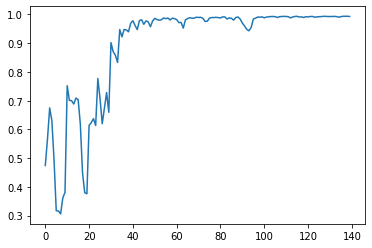


Robin Soderling vs Lleyton Hewitt winner was 1
winner should be 1.0
(321, 32)
predicted correctly


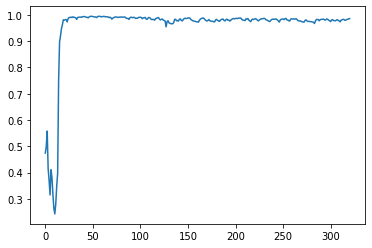


Igor Andreev vs Bernard Tomic winner was 2
winner should be 1.0
(288, 32)
predicted correctly


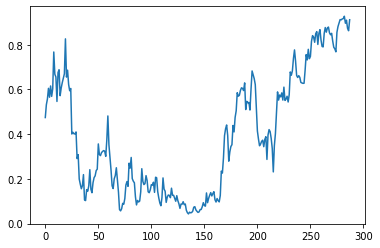


Dmitry Tursunov vs Jurgen Melzer winner was 2
winner should be 0.0
(293, 32)
failed


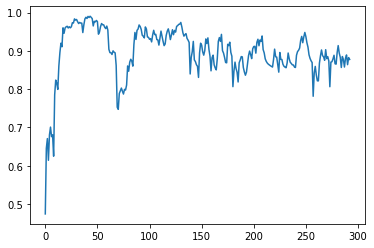


Viktor Troicki vs Yen-Hsun Lu winner was 2
winner should be 0.0
(204, 32)
predicted correctly


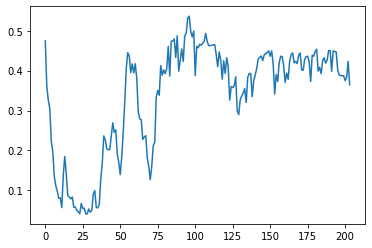


Marcos Baghdatis vs Andreas Seppi winner was 1
winner should be 0.0
(224, 32)
predicted correctly


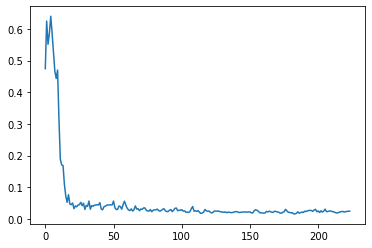


Kevin Anderson vs Novak Djokovic winner was 2
winner should be 1.0
(160, 32)
predicted correctly


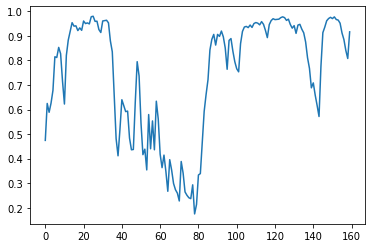


Rafael Nadal vs Gilles Muller winner was 1
winner should be 1.0
(190, 32)
predicted correctly


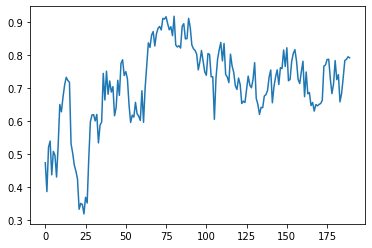


Juan Martin Del Potro vs Gilles Simon winner was 1
winner should be 1.0
(240, 32)
failed


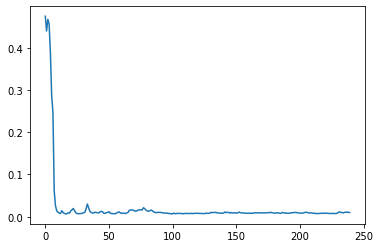


Alex Bogomolov Jr. vs Tomas Berdych winner was 2
winner should be 0.0
(154, 32)
predicted correctly


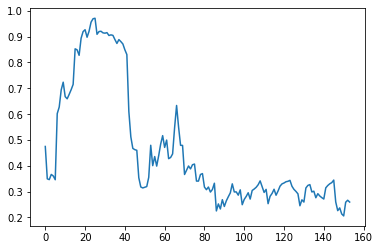


Andy Murray vs Ivan Ljubicic winner was 1
winner should be 1.0
(243, 32)
predicted correctly


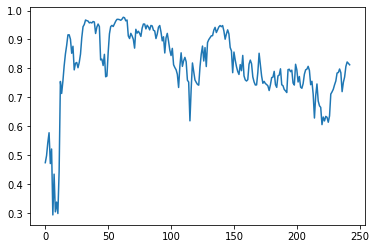


Gael Monfils vs Lukasz Kubot winner was 2
winner should be 0.0
(225, 32)
predicted correctly


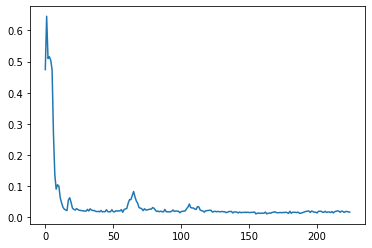


Feliciano Lopez vs Andy Roddick winner was 1
winner should be 0.0
(216, 32)
failed


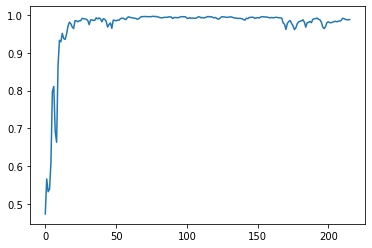


David Ferrer vs Karol Beck winner was 1
winner should be 0.0
(185, 32)
predicted correctly


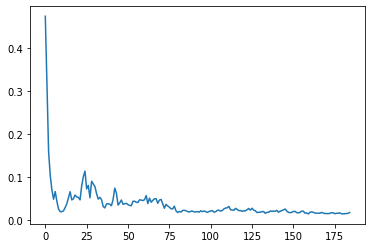


Fernando Gonzalez vs Jo-Wilfried Tsonga winner was 2
winner should be 1.0
(149, 32)
predicted correctly


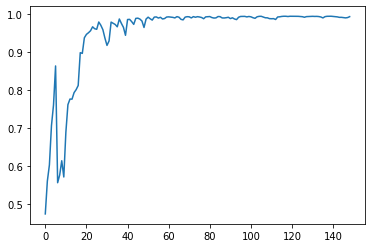


Nicolas Almagro vs Mikhail Youzhny winner was 2
winner should be 1.0
(251, 32)
predicted correctly


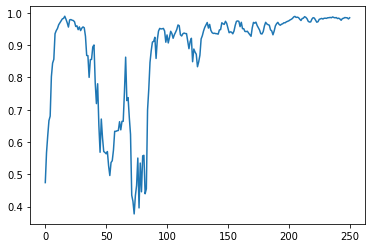


David Nalbandian vs Roger Federer winner was 2
winner should be 1.0
(175, 32)
predicted correctly


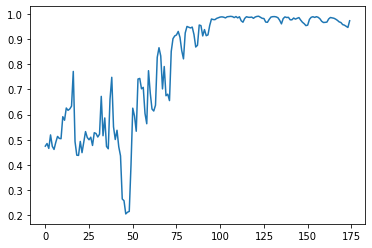


Robin Soderling vs Bernard Tomic winner was 2
winner should be 1.0
(179, 32)
failed


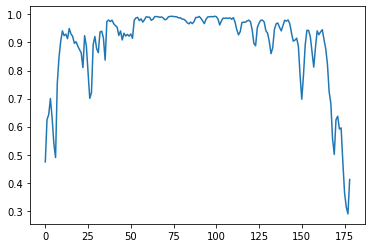


Xavier Malisse vs Jurgen Melzer winner was 1
winner should be 1.0
(166, 32)
failed


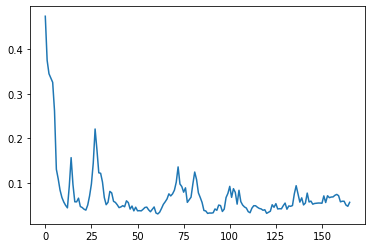


Marcos Baghdatis vs Novak Djokovic winner was 2
winner should be 0.0
(255, 32)
failed


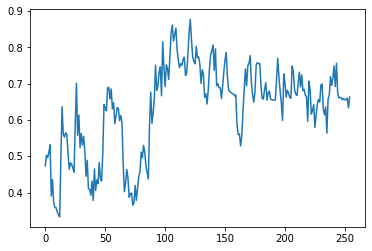


Rafael Nadal vs Juan Martin Del Potro winner was 1
winner should be 1.0
(272, 32)
predicted correctly


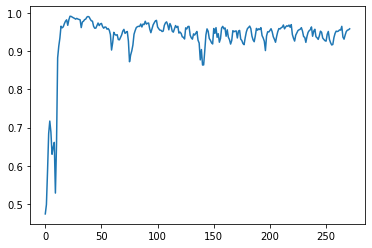


Mardy Fish vs Tomas Berdych winner was 1
winner should be 0.0
(204, 32)
predicted correctly


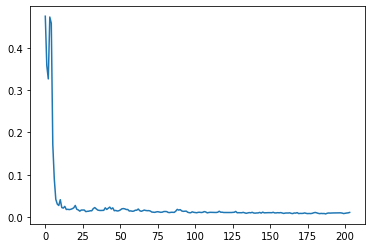


Andy Murray vs Richard Gasquet winner was 1
winner should be 1.0
(178, 32)
failed


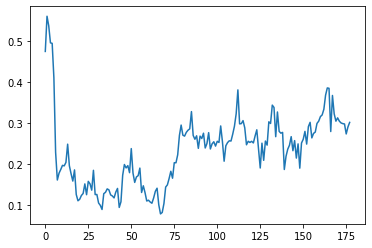


Lukasz Kubot vs Feliciano Lopez winner was 2
winner should be 0.0
(362, 32)
predicted correctly


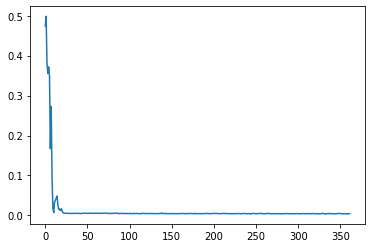


David Ferrer vs Jo-Wilfried Tsonga winner was 2
winner should be 0.0
(184, 32)
predicted correctly


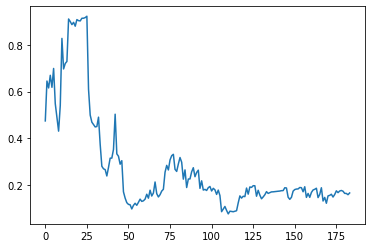


Mikhail Youzhny vs Roger Federer winner was 2
winner should be 1.0
(255, 32)
predicted correctly


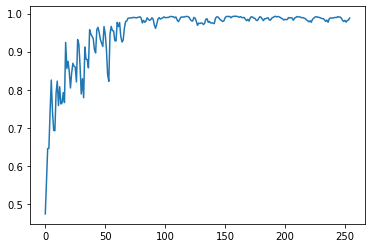


Bernard Tomic vs Xavier Malisse winner was 1
winner should be 1.0
(165, 32)
predicted correctly


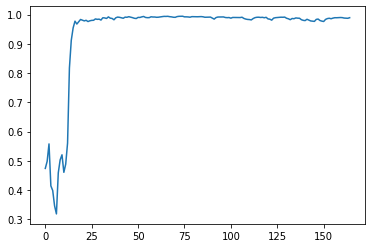


Michael Llodra vs Novak Djokovic winner was 2
winner should be 1.0
(155, 32)
predicted correctly


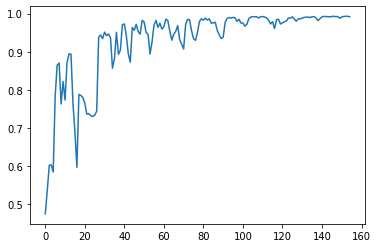


Rafael Nadal vs Mardy Fish winner was 1
winner should be 0.0
(229, 32)
predicted correctly


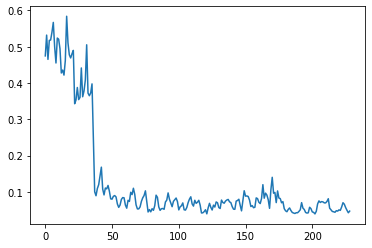


Andy Murray vs Feliciano Lopez winner was 1
winner should be 0.0
(183, 32)
predicted correctly


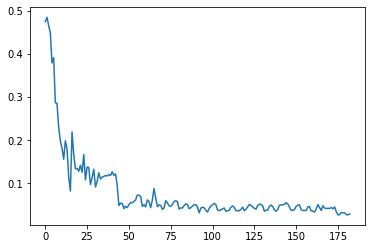


Jo-Wilfried Tsonga vs Roger Federer winner was 1
winner should be 1.0
(283, 32)
failed


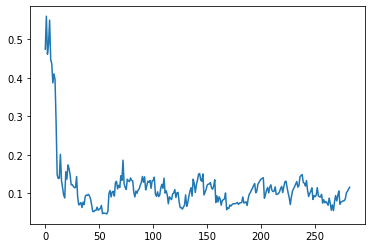


Bernard Tomic vs Novak Djokovic winner was 2
winner should be 1.0
(254, 32)
predicted correctly


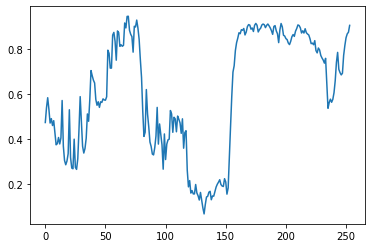


Rafael Nadal vs Andy Murray winner was 1
winner should be 0.0
(217, 32)
predicted correctly


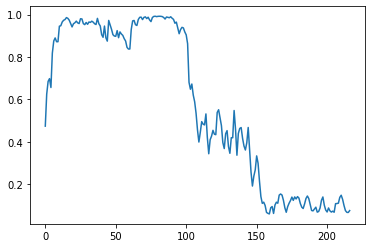


Jo-Wilfried Tsonga vs Novak Djokovic winner was 2
winner should be 0.0
(254, 32)
failed


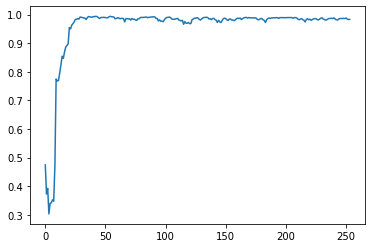


Rafael Nadal vs Novak Djokovic winner was 2
winner should be 1.0
(178, 32)
predicted correctly


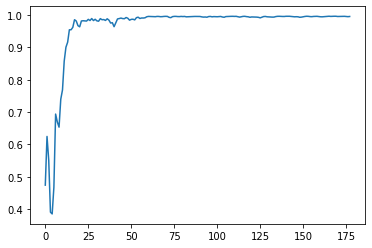


Caroline Wozniacki vs Arantxa Parra Santonja winner was 1
winner should be 1.0
(93, 32)
predicted correctly


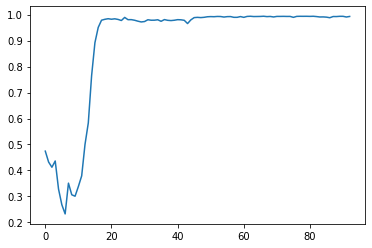


Mathilde Johansson vs Heather Watson winner was 1
winner should be 1.0
(185, 32)
predicted correctly


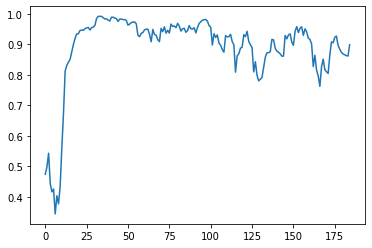


Elena Baltacha vs Mona Barthel winner was 1
winner should be 1.0
(123, 32)
predicted correctly


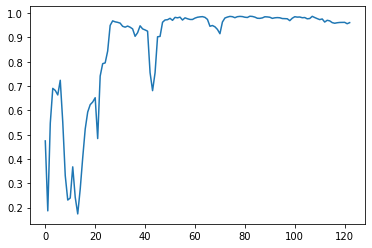


Anna Chakvetadze vs Maria Sharapova winner was 2
winner should be 0.0
(105, 32)
predicted correctly


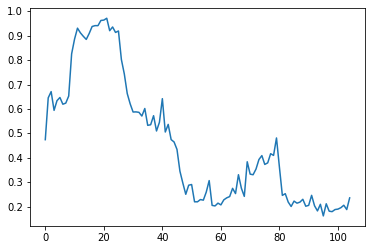


Na Li vs Alla Kudryavtseva winner was 1
winner should be 0.0
(103, 32)
predicted correctly


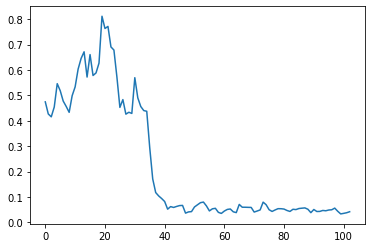


Ana Ivanovic vs Melanie Oudin winner was 1
winner should be 0.0
(75, 32)
predicted correctly


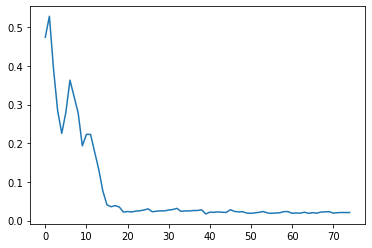


Marion Bartoli vs Kristyna Pliskova winner was 1
winner should be 0.0
(83, 32)
predicted correctly


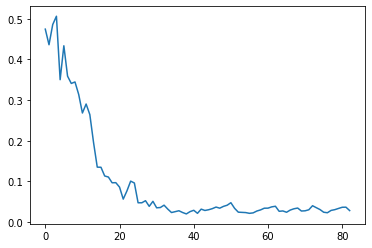


Aravane Rezai vs Serena Williams winner was 2
winner should be 0.0
(148, 32)
predicted correctly


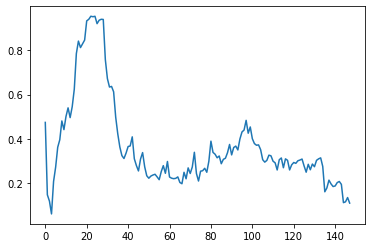


Francesca Schiavone vs Jelena Dokic winner was 1
winner should be 0.0
(178, 32)
predicted correctly


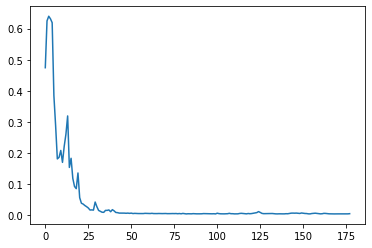


Stephanie Foretz Gacon vs Andrea Petkovic winner was 2
winner should be 1.0
(135, 32)
failed


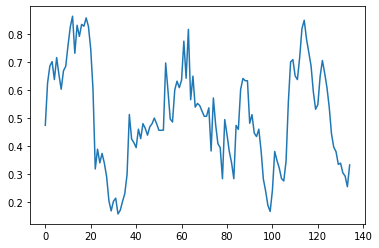


Magdalena Rybarikova vs Victoria Azarenka winner was 2
winner should be 1.0
(107, 32)
failed


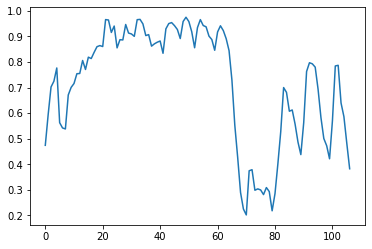


Naomi Broady vs Anne Keothavong winner was 2
winner should be 0.0
(139, 32)
predicted correctly


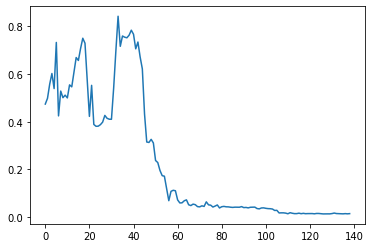


Jelena Jankovic vs Maria Jose Martinez Sanchez winner was 2
winner should be 0.0
(204, 32)
predicted correctly


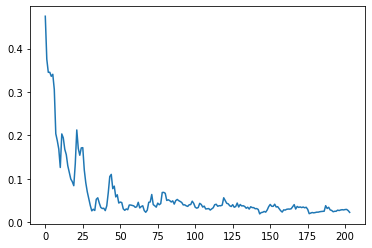


Caroline Wozniacki vs Virginie Razzano winner was 1
winner should be 1.0
(99, 32)
predicted correctly


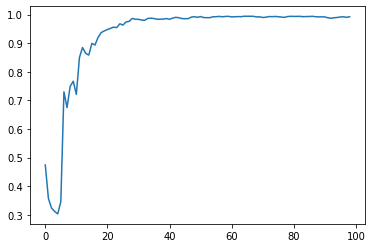


Elena Baltacha vs Shuai Peng winner was 2
winner should be 1.0
(197, 32)
predicted correctly


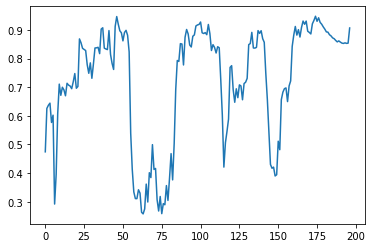


Laura Robson vs Maria Sharapova winner was 2
winner should be 0.0
(155, 32)
failed


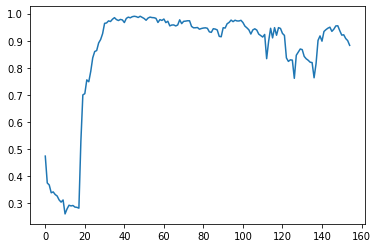


Na Li vs Sabine Lisicki winner was 2
winner should be 1.0
(202, 32)
failed


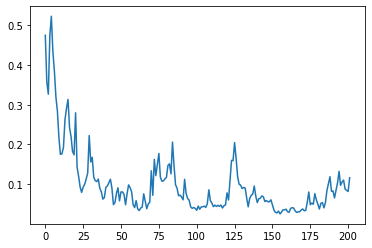


Ana Ivanovic vs Eleni Daniilidou winner was 1
winner should be 1.0
(97, 32)
failed


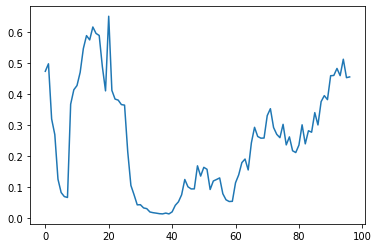


Marion Bartoli vs Lourdes Dominguez Lino winner was 1
winner should be 0.0
(181, 32)
predicted correctly


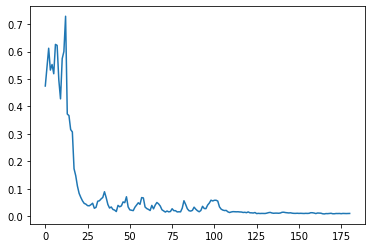


Simona Halep vs Serena Williams winner was 2
winner should be 1.0
(147, 32)
predicted correctly


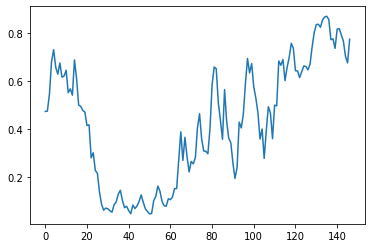


Francesca Schiavone vs Barbora Zahlavova Strycova winner was 1
winner should be 1.0
(146, 32)
failed


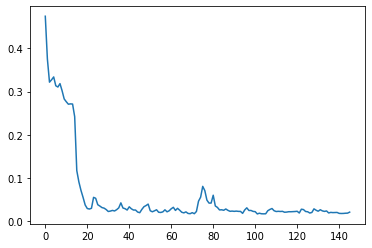


Stephanie Dubois vs Andrea Petkovic winner was 2
winner should be 1.0
(185, 32)
predicted correctly


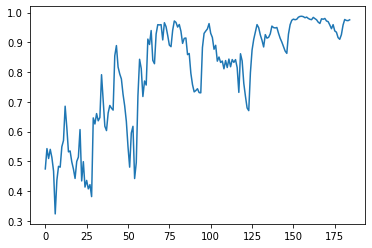


Petra Kvitova vs Anne Keothavong winner was 1
winner should be 0.0
(102, 32)
predicted correctly


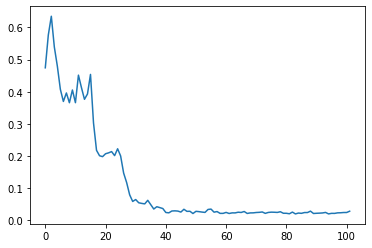


Alexandra Dulgheru vs Svetlana Kuznetsova winner was 2
winner should be 0.0
(91, 32)
predicted correctly


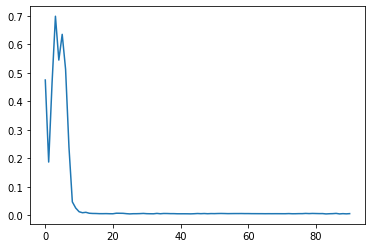


Kimiko Date-Krumm vs Venus Williams winner was 2
winner should be 1.0
(255, 32)
predicted correctly


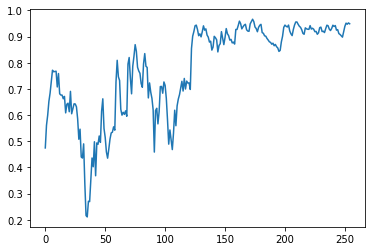


Elena Vesnina vs Vera Zvonareva winner was 2
winner should be 0.0
(120, 32)
predicted correctly


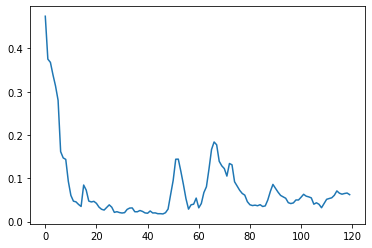


Caroline Wozniacki vs Jarmila Gajdosova winner was 1
winner should be 0.0
(100, 32)
predicted correctly


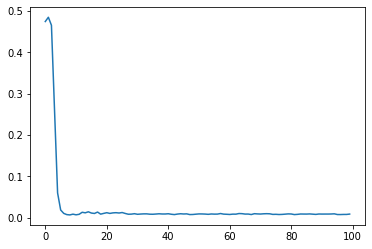


Dominika Cibulkova vs Julia Goerges winner was 1
winner should be 0.0
(152, 32)
failed


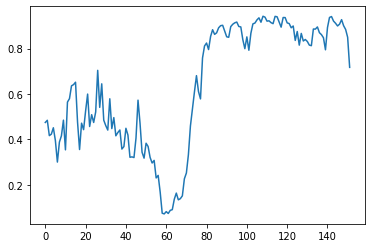


Melinda Czink vs Shuai Peng winner was 2
winner should be 1.0
(133, 32)
failed


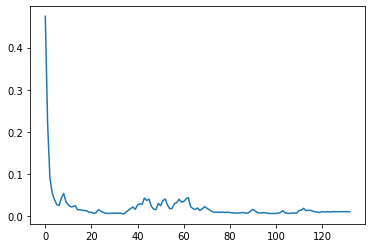


Klara Zakopalova vs Maria Sharapova winner was 2
winner should be 0.0
(120, 32)
predicted correctly


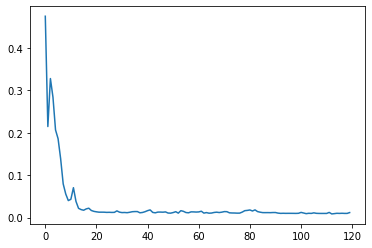


Ana Ivanovic vs Petra Cetkovska winner was 2
winner should be 1.0
(127, 32)
failed


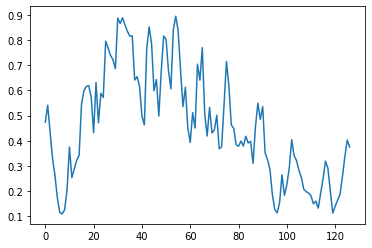


Marion Bartoli vs Flavia Pennetta winner was 1
winner should be 0.0
(292, 32)
predicted correctly


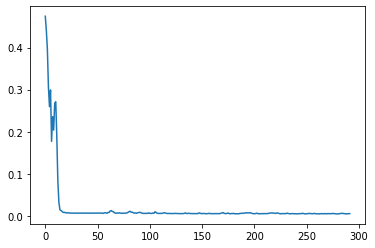


Maria Kirilenko vs Serena Williams winner was 2
winner should be 0.0
(120, 32)
predicted correctly


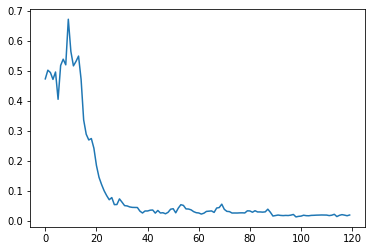


Francesca Schiavone vs Tamira Paszek winner was 2
winner should be 1.0
(287, 32)
failed


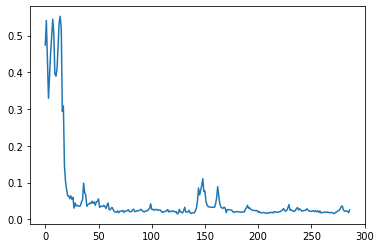


Daniela Hantuchova vs Victoria Azarenka winner was 2
winner should be 0.0
(178, 32)
failed


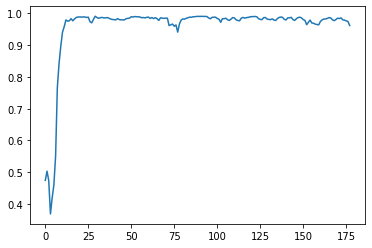


Petra Kvitova vs Roberta Vinci winner was 1
winner should be 0.0
(106, 32)
predicted correctly


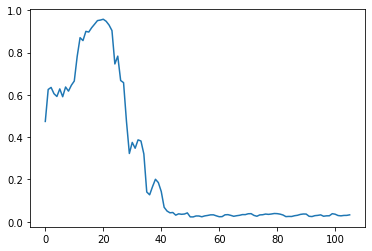


Yanina Wickmayer vs Svetlana Kuznetsova winner was 1
winner should be 0.0
(183, 32)
failed


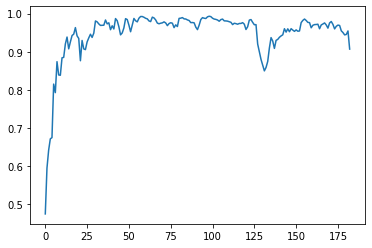


Maria Jose Martinez Sanchez vs Venus Williams winner was 2
winner should be 1.0
(87, 32)
predicted correctly


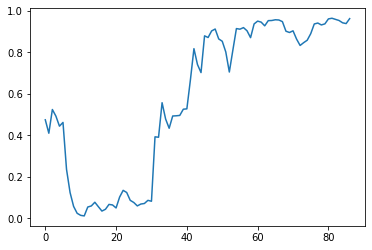


Tsvetana Pironkova vs Vera Zvonareva winner was 1
winner should be 1.0
(105, 32)
failed


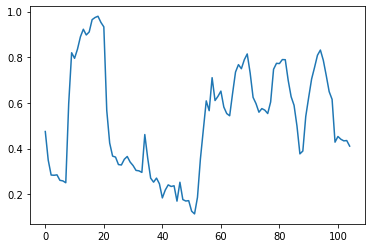


Caroline Wozniacki vs Dominika Cibulkova winner was 2
winner should be 1.0
(222, 32)
failed


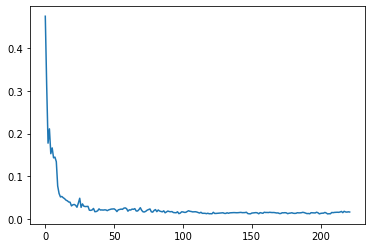


Shuai Peng vs Maria Sharapova winner was 2
winner should be 0.0
(119, 32)
predicted correctly


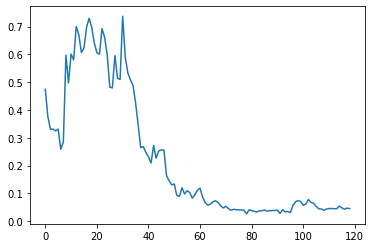


Sabine Lisicki vs Petra Cetkovska winner was 1
winner should be 0.0
(113, 32)
predicted correctly


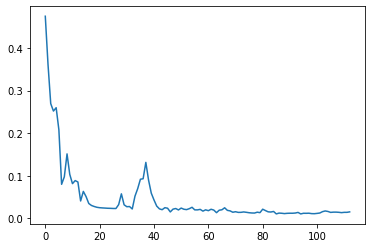


Marion Bartoli vs Serena Williams winner was 1
winner should be 0.0
(154, 32)
predicted correctly


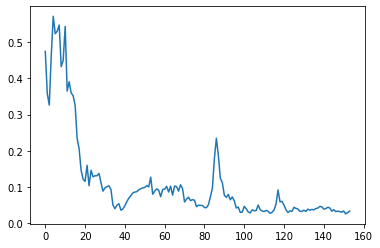


Nadia Petrova vs Victoria Azarenka winner was 2
winner should be 1.0
(97, 32)
predicted correctly


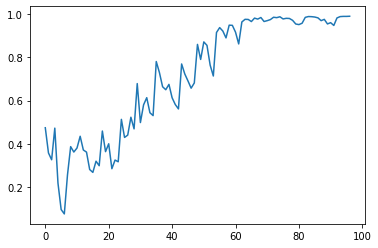


Petra Kvitova vs Yanina Wickmayer winner was 1
winner should be 0.0
(80, 32)
predicted correctly


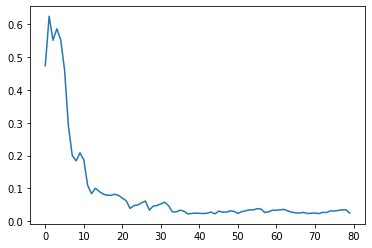


Venus Williams vs Tsvetana Pironkova winner was 2
winner should be 1.0
(107, 32)
predicted correctly


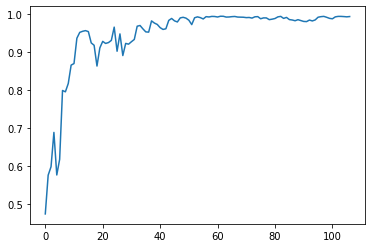


Dominika Cibulkova vs Maria Sharapova winner was 2
winner should be 1.0
(93, 32)
predicted correctly


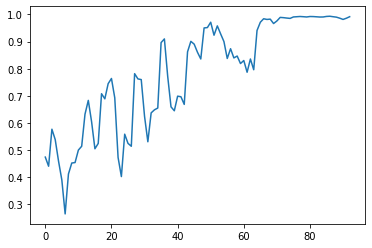


Sabine Lisicki vs Marion Bartoli winner was 1
winner should be 1.0
(202, 32)
predicted correctly


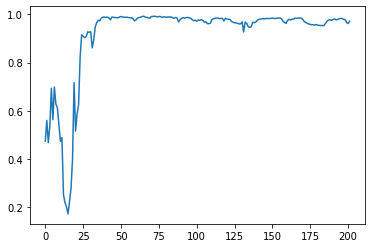


Tamira Paszek vs Victoria Azarenka winner was 2
winner should be 0.0
(108, 32)
predicted correctly


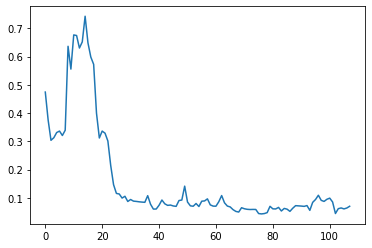


Petra Kvitova vs Tsvetana Pironkova winner was 1
winner should be 1.0
(185, 32)
failed


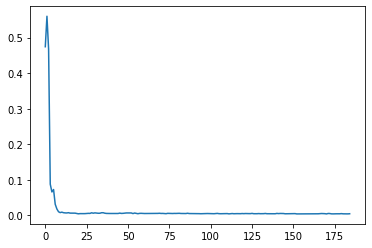


Maria Sharapova vs Sabine Lisicki winner was 1
winner should be 1.0
(122, 32)
failed


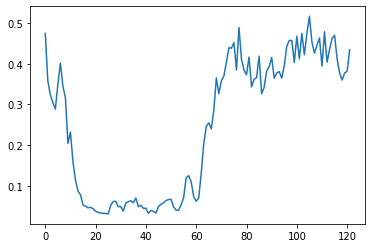


Victoria Azarenka vs Petra Kvitova winner was 2
winner should be 1.0
(157, 32)
predicted correctly


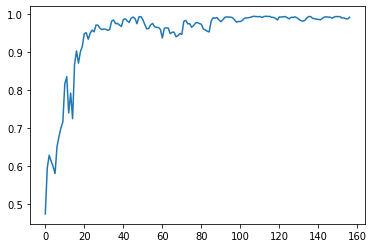


Maria Sharapova vs Petra Kvitova winner was 2
winner should be 1.0
(129, 32)
predicted correctly


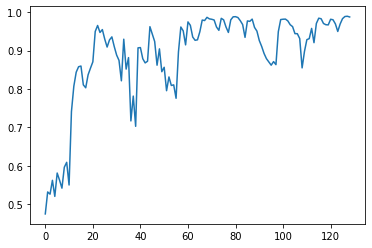


0.2905982905982906


In [217]:
test_data = get_training_data_from_open(wimble_2011_matches, wimble_2011_points, True)
print(f'testing on {len(test_data)} examples')
correct, wrong = 0, 0 
for i, test_example in enumerate(test_data):
    model.hidden = model.init_hidden()

    x, y, debug_string = test_example
    print(debug_string)
    print(f"winner should be {y[-1]}")
    preds = np.array([])
    print(x.shape)
    for i in range(x.shape[0]):
        x_i = torch.tensor(x[:i+1,:], device=device).float()
        pred = model(x_i)
        preds = np.append(preds, pred.detach().numpy()[-1])
#         print(x_i)
#         print(preds)
    fig = plt.figure()
    ax = plt.axes()
     
    ax.plot(preds);
    plt.show()
#     print(x)
#     print(y)
    #produces identical results to:
#     preds = model(torch.tensor(x, device=device).float()).detach().numpy()
#     fig = plt.figure()
#     ax = plt.axes()
#     ax.plot(preds);
#     plt.show()
    print()
print(correct/(correct + wrong))